# Introduction to Data Science - Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

C:\Users\pette\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Load the dataframe.

In [40]:
population_df = pd.read_csv('../data/population_df.csv')
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years All levels of education,Education % 15-24 years Elementary or unknown,Education % 15-24 years Total graduates,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,...,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children,municipality,code,name,green area %
0,0,0.059870,0.008553,0.000342,0.116319,0.047554,0.068765,0.105371,0.083134,0.157030,...,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,91,10,Kruununhaka,9.361723
1,1,0.079023,0.016667,0.000575,0.145402,0.049138,0.096264,0.074138,0.103736,0.157471,...,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,91,10,Kruununhaka,9.361723
2,0,0.058338,0.007025,0.000000,0.100794,0.035431,0.065363,0.168601,0.136225,0.140195,...,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,91,101,Vilhonvuori,18.843288
3,1,0.088615,0.018624,0.001502,0.143286,0.034545,0.108741,0.123160,0.141484,0.147792,...,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,91,101,Vilhonvuori,18.843288
4,0,0.056744,0.008216,0.000382,0.115017,0.049675,0.065342,0.107375,0.081582,0.138135,...,0.354232,0.227415,0.243374,0.058991,0.021659,0.094329,91,101,Vironniemen peruspiiri,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,1,0.046091,0.006647,0.000399,0.113049,0.059912,0.053136,0.101443,0.095361,0.100946,...,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590,91,997,Esikaupungit,NaN
364,0,0.068623,0.009455,0.000423,0.122246,0.043744,0.078502,0.148989,0.112253,0.144381,...,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,91,998,Kantakaupunki,NaN
365,1,0.088223,0.017459,0.001057,0.147080,0.040342,0.106738,0.100800,0.129216,0.164055,...,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,91,998,Kantakaupunki,NaN
366,0,0.039430,0.002767,0.000000,0.142225,0.100028,0.042197,0.148727,0.036386,0.039568,...,NaN,NaN,NaN,NaN,NaN,NaN,91,999,Muut,NaN


Filter only basic level districs.

In [41]:
population_df = population_df[~population_df['name'].str.contains('peruspiiri')]
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years All levels of education,Education % 15-24 years Elementary or unknown,Education % 15-24 years Total graduates,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,...,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children,municipality,code,name,green area %
0,0,0.059870,0.008553,0.000342,0.116319,0.047554,0.068765,0.105371,0.083134,0.157030,...,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,91,10,Kruununhaka,9.361723
1,1,0.079023,0.016667,0.000575,0.145402,0.049138,0.096264,0.074138,0.103736,0.157471,...,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,91,10,Kruununhaka,9.361723
2,0,0.058338,0.007025,0.000000,0.100794,0.035431,0.065363,0.168601,0.136225,0.140195,...,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,91,101,Vilhonvuori,18.843288
3,1,0.088615,0.018624,0.001502,0.143286,0.034545,0.108741,0.123160,0.141484,0.147792,...,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,91,101,Vilhonvuori,18.843288
6,0,0.064842,0.009263,0.000421,0.111579,0.037053,0.074526,0.167158,0.135579,0.182316,...,0.291057,0.194038,0.336585,0.087263,0.014092,0.076965,91,102,Kalasatama,1.860516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,1,0.046091,0.006647,0.000399,0.113049,0.059912,0.053136,0.101443,0.095361,0.100946,...,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590,91,997,Esikaupungit,NaN
364,0,0.068623,0.009455,0.000423,0.122246,0.043744,0.078502,0.148989,0.112253,0.144381,...,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,91,998,Kantakaupunki,NaN
365,1,0.088223,0.017459,0.001057,0.147080,0.040342,0.106738,0.100800,0.129216,0.164055,...,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,91,998,Kantakaupunki,NaN
366,0,0.039430,0.002767,0.000000,0.142225,0.100028,0.042197,0.148727,0.036386,0.039568,...,NaN,NaN,NaN,NaN,NaN,NaN,91,999,Muut,NaN


Set distric code to index.

In [42]:
population_df = population_df.drop(['municipality', 'name'], axis=1)
population_df = population_df.set_index('code')
population_df.columns = population_df.columns.get_level_values(0)
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years All levels of education,Education % 15-24 years Elementary or unknown,Education % 15-24 years Total graduates,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,...,Outside the labor force,Taxable income per housing association,Taxable income per person,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children,green area %
code,,,,,,,,,,,,,,,,,,,,,
10,0,0.059870,0.008553,0.000342,0.116319,0.047554,0.068765,0.105371,0.083134,0.157030,...,0.184111,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
10,1,0.079023,0.016667,0.000575,0.145402,0.049138,0.096264,0.074138,0.103736,0.157471,...,0.232195,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
101,0,0.058338,0.007025,0.000000,0.100794,0.035431,0.065363,0.168601,0.136225,0.140195,...,0.158090,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
101,1,0.088615,0.018624,0.001502,0.143286,0.034545,0.108741,0.123160,0.141484,0.147792,...,0.200543,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
102,0,0.064842,0.009263,0.000421,0.111579,0.037053,0.074526,0.167158,0.135579,0.182316,...,0.159760,71436.0,36204.0,0.291057,0.194038,0.336585,0.087263,0.014092,0.076965,1.860516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1,0.046091,0.006647,0.000399,0.113049,0.059912,0.053136,0.101443,0.095361,0.100946,...,0.265282,55559.0,28197.0,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590,NaN
998,0,0.068623,0.009455,0.000423,0.122246,0.043744,0.078502,0.148989,0.112253,0.144381,...,0.184181,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN
998,1,0.088223,0.017459,0.001057,0.147080,0.040342,0.106738,0.100800,0.129216,0.164055,...,0.221443,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN


## Multicollinearity

Correlation of variables. Variables related to education.

In [43]:
educational_data = population_df.filter(regex='Education')
corr = educational_data.corr()

<AxesSubplot:>

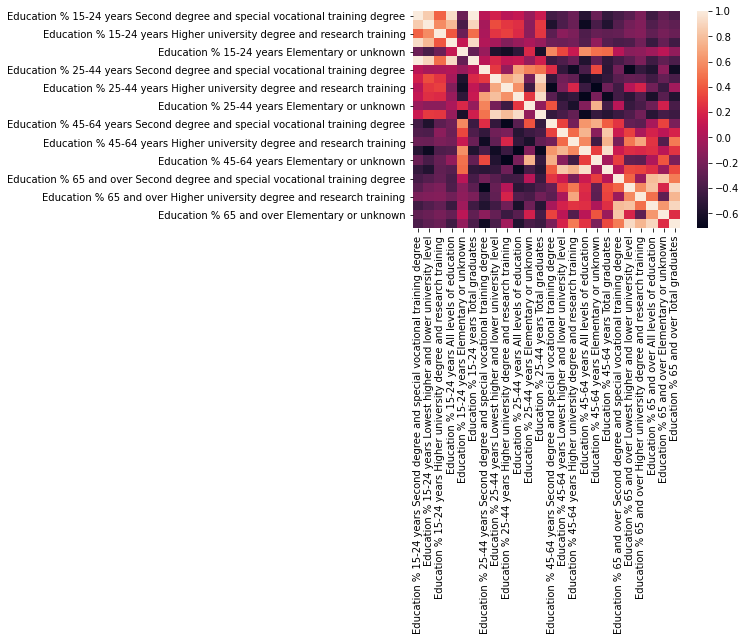

In [44]:
sns.heatmap(corr)

<AxesSubplot:>

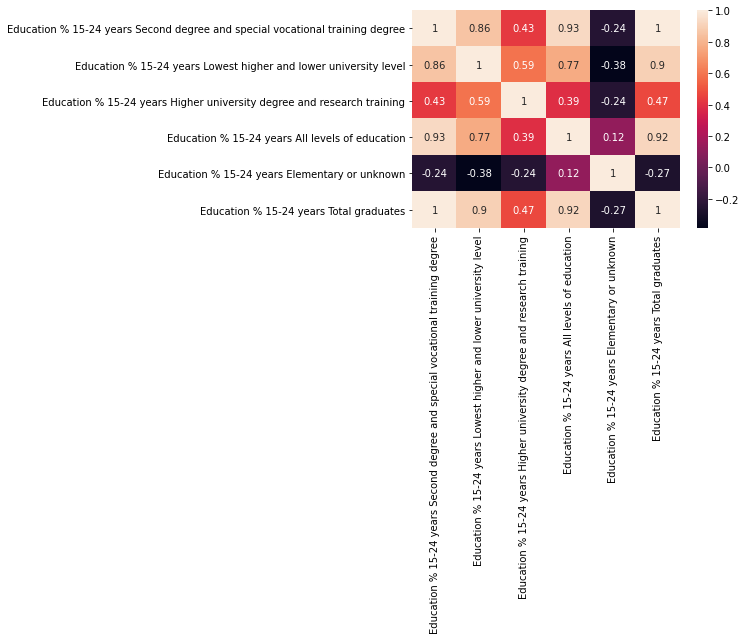

In [45]:
education_15_24 = educational_data.filter(regex='15')
corr = education_15_24.corr()
sns.heatmap(corr, annot=True)

Remove columns which show total graduates and all levels of education.

In [46]:
total_columns = [col for col in population_df.columns if 'Total' in col]
population_df = population_df.drop(columns=total_columns, axis=1)
all_levels_columns = [col for col in population_df.columns if 'All levels' in col]
population_df = population_df.drop(columns=all_levels_columns, axis=1)
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years Elementary or unknown,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,Education % 25-44 years Elementary or unknown,Education % 45-64 years Second degree and special vocational training degree,...,Outside the labor force,Taxable income per housing association,Taxable income per person,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children,green area %
code,,,,,,,,,,,,,,,,,,,,,
10,0,0.059870,0.008553,0.000342,0.047554,0.105371,0.083134,0.157030,0.050975,0.076976,...,0.184111,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
10,1,0.079023,0.016667,0.000575,0.049138,0.074138,0.103736,0.157471,0.030460,0.042241,...,0.232195,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
101,0,0.058338,0.007025,0.000000,0.035431,0.168601,0.136225,0.140195,0.083384,0.083995,...,0.158090,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
101,1,0.088615,0.018624,0.001502,0.034545,0.123160,0.141484,0.147792,0.044157,0.051968,...,0.200543,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
102,0,0.064842,0.009263,0.000421,0.037053,0.167158,0.135579,0.182316,0.061895,0.065684,...,0.159760,71436.0,36204.0,0.291057,0.194038,0.336585,0.087263,0.014092,0.076965,1.860516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1,0.046091,0.006647,0.000399,0.059912,0.101443,0.095361,0.100946,0.050709,0.084687,...,0.265282,55559.0,28197.0,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590,NaN
998,0,0.068623,0.009455,0.000423,0.043744,0.148989,0.112253,0.144381,0.070041,0.078010,...,0.184181,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN
998,1,0.088223,0.017459,0.001057,0.040342,0.100800,0.129216,0.164055,0.036162,0.054293,...,0.221443,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN


<AxesSubplot:>

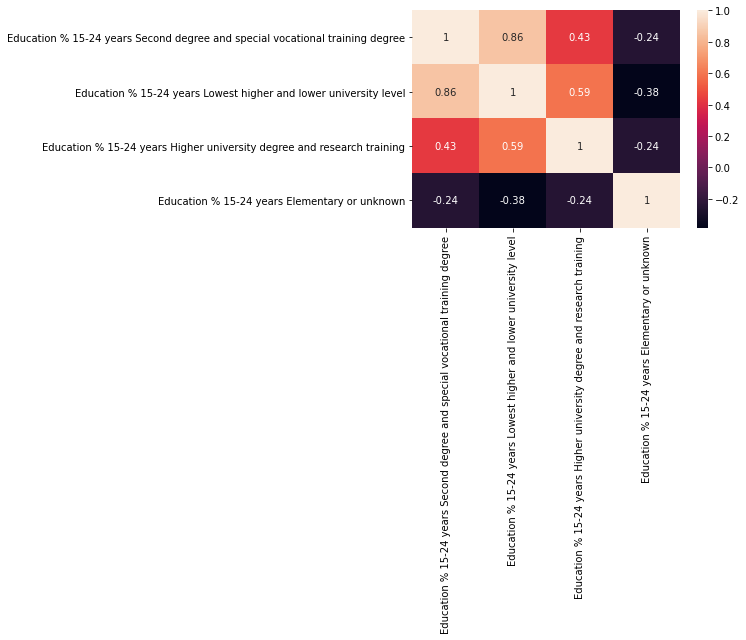

In [47]:
educational_data = population_df.filter(regex='Education % 15')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

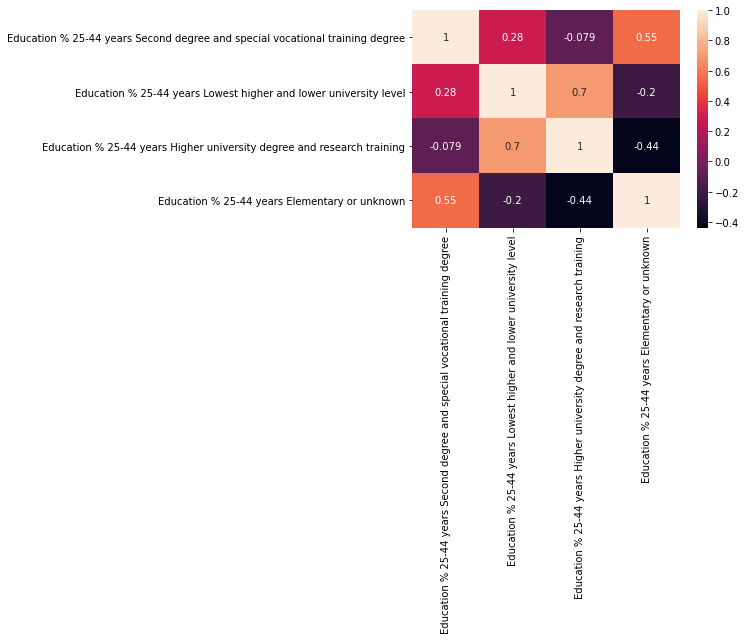

In [48]:
educational_data = population_df.filter(regex='Education % 25')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

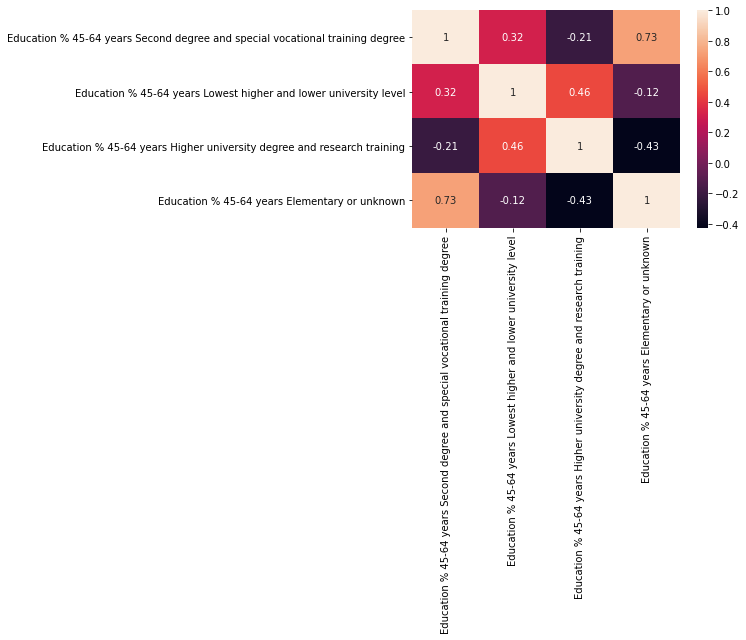

In [49]:
educational_data = population_df.filter(regex='Education % 45')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

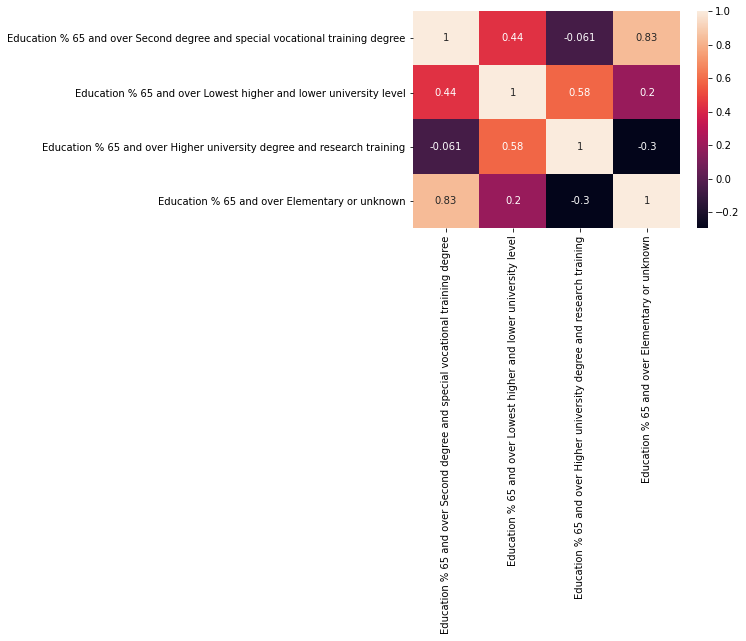

In [50]:
educational_data = population_df.filter(regex='Education % 65')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

Correlation of other variables than educational variables.

In [51]:
educational_variables = population_df.filter(regex='Education')
other_variables = population_df.loc[:, ~population_df.columns.isin(educational_variables)]

<AxesSubplot:>

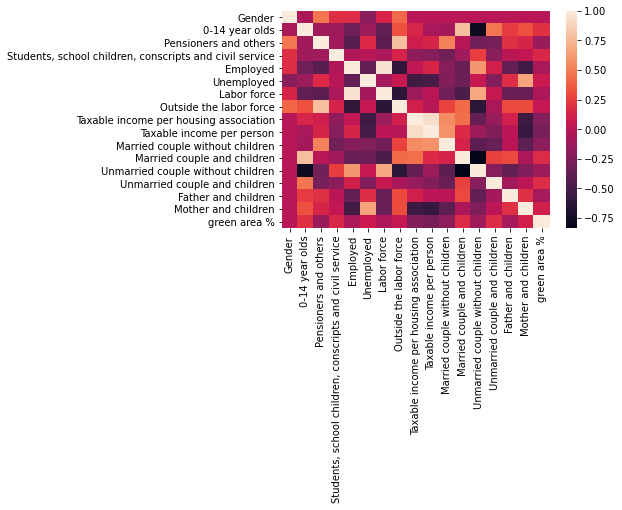

In [52]:
corr = other_variables.corr()
sns.heatmap(corr)

<AxesSubplot:>

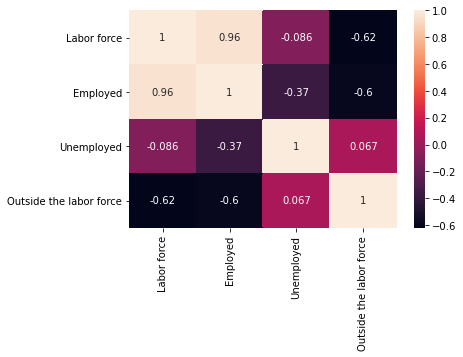

In [53]:
labor_force = population_df[['Labor force', 'Employed', 'Unemployed', 'Outside the labor force']]
corr = labor_force.corr()
sns.heatmap(corr, annot=True)

In [54]:
population_df = population_df.drop(columns=['Labor force'], axis=1)
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years Elementary or unknown,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,Education % 25-44 years Elementary or unknown,Education % 45-64 years Second degree and special vocational training degree,...,Outside the labor force,Taxable income per housing association,Taxable income per person,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children,green area %
code,,,,,,,,,,,,,,,,,,,,,
10,0,0.059870,0.008553,0.000342,0.047554,0.105371,0.083134,0.157030,0.050975,0.076976,...,0.184111,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
10,1,0.079023,0.016667,0.000575,0.049138,0.074138,0.103736,0.157471,0.030460,0.042241,...,0.232195,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
101,0,0.058338,0.007025,0.000000,0.035431,0.168601,0.136225,0.140195,0.083384,0.083995,...,0.158090,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
101,1,0.088615,0.018624,0.001502,0.034545,0.123160,0.141484,0.147792,0.044157,0.051968,...,0.200543,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
102,0,0.064842,0.009263,0.000421,0.037053,0.167158,0.135579,0.182316,0.061895,0.065684,...,0.159760,71436.0,36204.0,0.291057,0.194038,0.336585,0.087263,0.014092,0.076965,1.860516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1,0.046091,0.006647,0.000399,0.059912,0.101443,0.095361,0.100946,0.050709,0.084687,...,0.265282,55559.0,28197.0,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590,NaN
998,0,0.068623,0.009455,0.000423,0.043744,0.148989,0.112253,0.144381,0.070041,0.078010,...,0.184181,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN
998,1,0.088223,0.017459,0.001057,0.040342,0.100800,0.129216,0.164055,0.036162,0.054293,...,0.221443,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN


<AxesSubplot:>

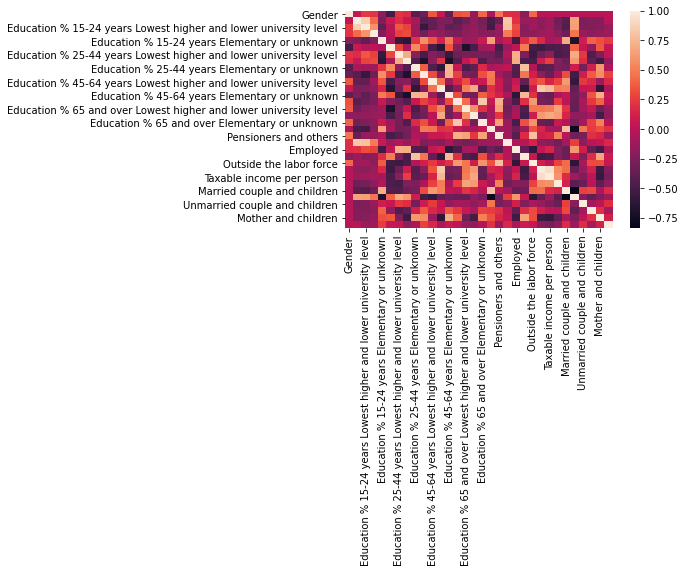

In [55]:
corr = population_df.corr()
sns.heatmap(corr)

## Linear Regression

In [56]:
y = population_df['green area %']
X = population_df.drop('green area %', axis=1)

In [57]:
X.columns

Index(['Gender',
       'Education % 15-24 years Second degree and special vocational training degree',
       'Education % 15-24 years Lowest higher and lower university level',
       'Education % 15-24 years Higher university degree and research training',
       'Education % 15-24 years Elementary or unknown',
       'Education % 25-44 years Second degree and special vocational training degree',
       'Education % 25-44 years Lowest higher and lower university level',
       'Education % 25-44 years Higher university degree and research training',
       'Education % 25-44 years Elementary or unknown',
       'Education % 45-64 years Second degree and special vocational training degree',
       'Education % 45-64 years Lowest higher and lower university level',
       'Education % 45-64 years Higher university degree and research training',
       'Education % 45-64 years Elementary or unknown',
       'Education % 65 and over Second degree and special vocational training degree',

In [59]:
model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           green area %   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.815
Method:                 Least Squares   F-statistic:                              14.77
Date:                Sat, 14 Oct 2023   Prob (F-statistic):                    1.90e-19
Time:                        14:36:49   Log-Likelihood:                         -382.97
No. Observations:                  97   AIC:                                      827.9
Df Residuals:                      66   BIC:                                      907.8
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
                                                                                   coef    std err          t      P>|t|